In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error;
from sklearn.model_selection import train_test_split;

In [2]:
full_data=pd.read_csv('fulfilment_center_info.csv')
meal_data=pd.read_csv('meal_info.csv')
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')


In [3]:
full_data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
meal_data.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train_data.shape

(456548, 9)

In [8]:
meal_data.shape

(51, 3)

In [9]:
full_data.shape

(77, 5)

In [10]:
train_data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [11]:
import seaborn as sns

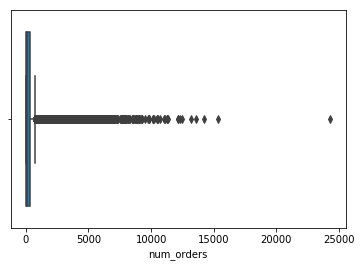

In [12]:
sns.boxplot(train_data['num_orders'])
plt.show()

In [13]:
train_data.shape

(456548, 9)

In [14]:
cnt=train_data['num_orders'].values
q99=np.percentile(cnt,[99])


train_df=train_data[train_data['num_orders']<q99[0]]
#sns.distplot(train_df['num_orders'])
#plt.show()

sns.boxplot(train_data_com['num_orders'])

plt.show()

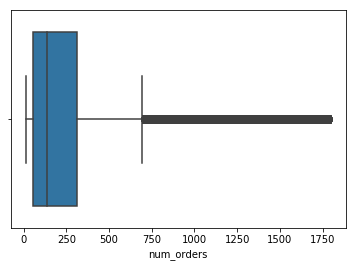

In [15]:
sns.boxplot(train_df['num_orders'])
plt.show()

In [16]:
train_data_com=pd.merge(train_df,full_data, how='left',on=['center_id'] )
train_data_com=pd.merge(train_data_com,meal_data, how='left',on=['meal_id'] )

In [17]:
train_data_com.shape

(451953, 15)

C:\Users\dwiver2\AppData\Local\Programs\Python\Python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


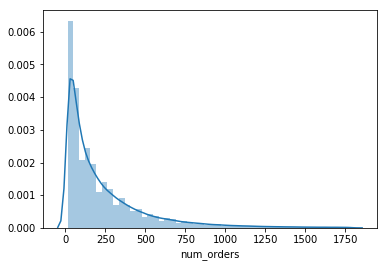

In [18]:
#After appling displot it seems highly sckewed data 

sns.distplot(train_data_com['num_orders'])
plt.show()

In [19]:
train_data_com['num_orders']=train_data_com['num_orders'].apply(lambda x:np.log(x))

C:\Users\dwiver2\AppData\Local\Programs\Python\Python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


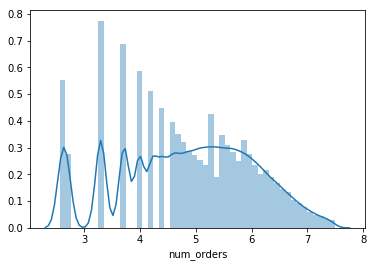

In [20]:
sns.distplot(train_data_com['num_orders'])
plt.show()

In [21]:
y=train_data_com['num_orders'];

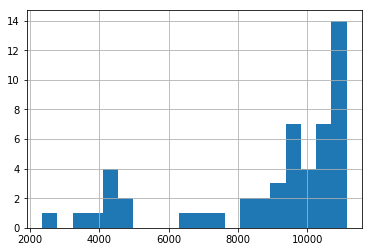

In [22]:
#Basic exploratory analysis to understand the trend of the data 
train_data_com['meal_id'].value_counts().hist(bins=20)


In [23]:
#time seriese analysis of the data 

#ts=train_data_com
#ts.index=train_data_com['week']
#plt.plot(pd.rolling_mean(ts['num_orders'],60))

In [24]:
#plt.plot(ts['num_orders'].rolling(28).mean())

In [25]:
train_data_com.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

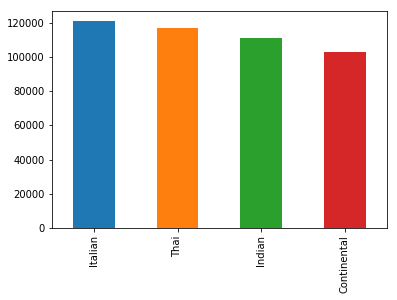

In [26]:
train_data_com['cuisine'].value_counts().plot(kind='bar')

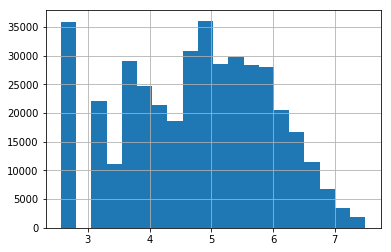

In [27]:
train_data_com[train_data_com['homepage_featured']==0]['num_orders'].hist(bins=20)

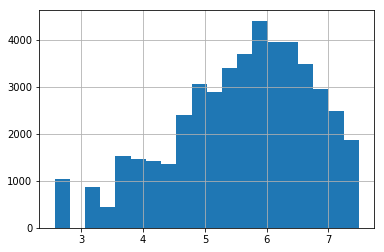

In [28]:
train_data_com[train_data_com['homepage_featured']==1]['num_orders'].hist(bins=20)

In [29]:
train_data_com['category'].value_counts()

Beverages       126535
Pizza            33101
Rice Bowl        31960
Sandwich         31849
Starters         29941
Other Snacks     29367
Desert           29294
Salad            28258
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

In [30]:
train_data_com['center_type'].value_counts()

TYPE_A    260281
TYPE_C     98942
TYPE_B     92730
Name: center_type, dtype: int64

In [31]:
train_data_com['center_type'].value_counts()

TYPE_A    260281
TYPE_C     98942
TYPE_B     92730
Name: center_type, dtype: int64

In [32]:
train_data_com['city_code'].value_counts()

590    53386
526    43288
638    19712
522    13364
517    13043
604    12929
699    11985
647    11703
576    11412
614    11276
676    11138
593    10755
685     6828
579     6771
713     6700
456     6662
679     6655
703     6634
700     6618
698     6377
577     6325
599     6265
596     6180
648     6063
654     6025
659     6010
602     6006
651     5952
562     5926
628     5920
615     5881
556     5862
561     5836
473     5826
461     5745
675     5693
620     5689
485     5672
609     5632
658     5586
553     5537
649     5522
680     5319
632     5281
683     5277
695     5259
702     5259
515     5064
478     5018
693     4607
541     4480
Name: city_code, dtype: int64

In [33]:
train_data_com['region_code'].value_counts()

56    188197
34    116222
77     94125
85     29961
23      6377
71      6180
93      5632
35      5259
Name: region_code, dtype: int64

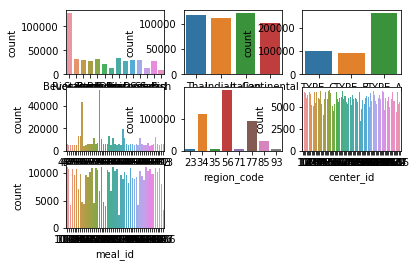

In [34]:
cat_names=['category','cuisine','center_type','city_code','region_code','center_id','meal_id']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(3,3,i)
    sns.countplot(name,data=train_data_com) 
    
plt.show()

In [35]:
test_data=pd.merge(test_data,full_data, how='left',on=['center_id'] )
test_data=pd.merge(test_data,meal_data, how='left',on=['meal_id'] )

In [36]:
from sklearn.preprocessing import LabelEncoder
from math import sqrt

In [37]:
train_data_com.drop('num_orders',axis=1,inplace=True)
print(train_data_com.shape)
print(train_data_com.shape)
print(test_data.shape)

(451953, 14)
(451953, 14)
(32573, 14)


In [38]:
#for var in cat_names:
                #lb = LabelEncoder()
                #full_var_data = pd.concat((train_data_com[var],test_data[var]),axis=0).astype('str')
                #temp = lb.fit_transform(np.array(full_var_data))
                #train_data_com[var] = lb.transform(np.array(train_data_com[var] ).astype('str'))
                #test_data[var] = lb.transform(np.array( test_data[var] ).astype('str'))

In [39]:
X_ohe=pd.get_dummies(train_data_com);
X_test_ohe=pd.get_dummies(test_data);
#X_test_ohe.head()
print(X_ohe.head());
print(X_test_ohe.head());

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  city_code  region_code  \
0                      0                  0        647           56   
1                      0                  0        647           56   
2                      0                  0        647           56   
3                      0                  0        647           56   
4                      0                  0        647           56   

       ...       category_Rice Bowl  category_Salad  category_Sandwich  \
0      ...                        0               0                  0   
1      ...      

In [40]:
train_data_com.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian
5,1270037,1,55,1248,251.23,252.23,0,0,647,56,TYPE_C,2.0,Beverages,Indian
6,1191377,1,55,1778,183.36,184.36,0,0,647,56,TYPE_C,2.0,Beverages,Italian
7,1499955,1,55,1062,182.36,183.36,0,0,647,56,TYPE_C,2.0,Beverages,Italian
8,1025244,1,55,2707,193.06,192.06,0,0,647,56,TYPE_C,2.0,Beverages,Italian
9,1054194,1,55,1207,325.92,384.18,0,1,647,56,TYPE_C,2.0,Beverages,Continental


In [41]:
#def feature_scaling(df):
    #df-=df.min()
    #df/=df.max()
    #return df


In [42]:
#feature_scaling(train_data_com['checkout_price'])
#feature_scaling(test_data['checkout_price'])

In [43]:
train_data_com.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0,Beverages,Indian
5,1270037,1,55,1248,251.23,252.23,0,0,647,56,TYPE_C,2.0,Beverages,Indian
6,1191377,1,55,1778,183.36,184.36,0,0,647,56,TYPE_C,2.0,Beverages,Italian
7,1499955,1,55,1062,182.36,183.36,0,0,647,56,TYPE_C,2.0,Beverages,Italian
8,1025244,1,55,2707,193.06,192.06,0,0,647,56,TYPE_C,2.0,Beverages,Italian
9,1054194,1,55,1207,325.92,384.18,0,1,647,56,TYPE_C,2.0,Beverages,Continental


In [44]:
#feature_scaling(train_data_com['base_price'])
#feature_scaling(test_data['base_price'])
from sklearn.preprocessing import StandardScaler;

scaler=StandardScaler();
X_ohe_scaled = scaler.fit_transform(X_ohe); #X_ohe.copy();
X_test_ohe_scaled = scaler.transform(X_test_ohe); #X_test_ohe.copy();



In [45]:
train_data_com.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [46]:
#train_data_com.drop('check_out_n',axis=1,inplace=True)

In [47]:
#test_data.drop('check_out_n',axis=1,inplace=True)

In [48]:
train_data_com.shape

(451953, 14)

In [49]:
test_data.shape

(32573, 14)

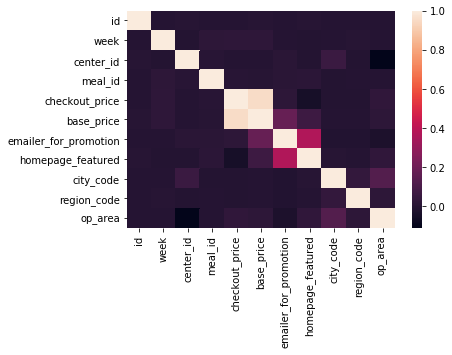

In [50]:
corrl=train_data_com.corr()
sns.heatmap(corrl)

In [51]:
#X_ohe_scaled=train_data_com.copy();
X_train,X_valid,y_train,y_valid=train_test_split(X_ohe_scaled,y,test_size=0.3,random_state=0);

In [52]:
#from xgboost import XGBRegressor;
#from sklearn.model_selection import train_test_split;
#X_train,X_valid,y_train,y_valid=train_test_split(X_ohe_scaled,y,test_size=0.3,random_state=0);

#xgb = XGBRegressor()
#xgb.fit(X_train, y_train);
#xgb_pred=xgb.predict(X_valid);

In [53]:
#xgb_pred_res=np.exp(xgb_pred);
#xgb_pred_res=xgb_pred_res.astype(np.int64);

#y_valid_res=np.exp(y_valid);
#y_valid_res=y_valid_res.astype(np.int64);

#print(type(xgb_pred_res));
#print(type(y_valid_res));
#print(100*mean_squared_log_error(y_valid_res,xgb_pred_res));
#print(np.sum(np.array(xgb_pred_res) >= 0, axis=0));
#print(np.sum(np.array(xgb_pred_res) < 0, axis=0));
#xgb_pred.round(0).astype(int)
#xgb_pred

In [54]:
#xgb_test_pred=xgb.predict(test_data);
#test_pred_res=np.exp(xgb_test_pred);
#test_pred=test_pred_res.astype(np.int64);
#test_pred

In [55]:
#print(np.sum(np.array(test_pred) >= 0, axis=0));
#print(np.sum(np.array(test_pred) < 0, axis=0));

In [56]:
#test_pred_ser=pd.Series(test_pred,name="num_orders");
#print(type(test_pred));
#print(type(test_pred_ser));
#print(type(test_data["id"]));
#id_test=test_data["id"];
#df_rfc = pd.concat([id_test,test_pred_ser],axis=1);
#df_rfc.head()
#df_rfc.to_csv("submission_xgb_V1.csv",index=False);

In [63]:
from sklearn.ensemble import RandomForestRegressor;
rfr=RandomForestRegressor(n_estimators=100,random_state=0);

rfr.fit(X_train,y_train);
rfr_pred=rfr.predict(X_valid);

#rfr.fit(train_data_com,y);
#rfr_pred=rfr.predict(test_data);

In [64]:
rfr_pred_res=np.exp(rfr_pred);
rfr_pred_res=rfr_pred_res.astype(np.int64);

y_valid_res=np.exp(y_valid);
y_valid_res=y_valid_res.astype(np.int64);

#print(type(rfr_pred_res));
#print(type(y_valid_res));
print(100*mean_squared_log_error(y_valid_res,rfr_pred_res));
print(np.sum(np.array(rfr_pred_res) >= 0, axis=0));
print(np.sum(np.array(rfr_pred_res) < 0, axis=0));

23.095988045738082
135586
0


In [65]:
rfr2=RandomForestRegressor(n_estimators=100,random_state=0);
rfr2.fit(X_ohe_scaled,y);
#test_pred_2=rfr2.predict(X_test_ohe_scaled);

#test_pred_2=np.exp(test_pred_2);
#test_pred_2=test_pred_2.astype(np.int64);

#test_pred_2

In [66]:
rfr_test_pred=rfr2.predict(X_test_ohe_scaled);
test_pred_res=np.exp(rfr_test_pred);
test_pred=test_pred_res.astype(np.int64);
test_pred

array([139, 136, 141, ..., 308, 303, 171], dtype=int64)

In [67]:
test_pred_ser=pd.Series(test_pred,name="num_orders");
print(type(test_pred));
print(type(test_pred_ser));
print(type(test_data["id"]));
id_test=test_data["id"];
df_rfc = pd.concat([id_test,test_pred_ser],axis=1);
df_rfc.head()
df_rfc.to_csv("submission_rfr_V6.csv",index=False);

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [68]:
import xgboost as xg
xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6)
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [71]:
xgr_pred=xgr.predict(X_valid);

In [72]:
xgr_pred_res=np.exp(xgr_pred);
xgr_pred_res=xgr_pred_res.astype(np.int64);

y_valid_res=np.exp(y_valid);
y_valid_res=y_valid_res.astype(np.int64);

#print(type(rfr_pred_res));
#print(type(y_valid_res));
print(100*mean_squared_log_error(y_valid_res,xgr_pred_res));
print(np.sum(np.array(xgr_pred_res) >= 0, axis=0));
print(np.sum(np.array(xgr_pred_res) < 0, axis=0));

25.057110554458784
135586
0


In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
gbm.fit(X_train,y_train)
gbm_pred=gbm.predict(X_valid);

In [74]:
gbm_pred_res=np.exp(gbm_pred);
gbm_pred_res=gbm_pred_res.astype(np.int64);

y_valid_res=np.exp(y_valid);
y_valid_res=y_valid_res.astype(np.int64);

#print(type(rfr_pred_res));
#print(type(y_valid_res));
print(100*mean_squared_log_error(y_valid_res,gbm_pred_res));
print(np.sum(np.array(gbm_pred_res) >= 0, axis=0));
print(np.sum(np.array(gbm_pred_res) < 0, axis=0));

24.20716734373827
135586
0


In [81]:
gbm.get_params()

{'alpha': 0.01,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}